# PHAS0031:Computational Physics: Week 4: Assessment
## Joshua Giblin-Burnham(SN.:19052055)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

C:\Users\Student\Anaconda3\lib\site-packages\scipy\__init__.py:149: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.4
  UserWarning)


In [2]:
def v(x):
    return k*x

### Introduction:

This notebook investigates the energy and eigenstates for the particle in a box; we will solve the Schrödinger equation as both  a boundary value problem (BVP) and by implementing the known solution on a grid (using finite differences and integration). For the BVP, we will adjust the energy of the solution until the wavefunction found goes to zero at the edge of the box (the necessary boundary value).
We will consider an electron in a box with length 1 Bohr radius (1 Bohr radius $\simeq0.529Å $, note: $m_e=\hbar=1$). The Schrödinger equation for this problem is:
$$-\frac{1}{2}\frac{d^2}{dx^2}\psi(x)=E\psi(x)$$

### Section 1: Schrodinger Equation

We can solve for $\psi(x)$ starting at $x=0$ and integrating to $x=1$ for any value of E. However, only values of $E$ which correspond to the eigenstates of the system will match the necessary boundary condition of $\psi(x=1)=0$. First, we will define the schrödinger as a coupled system of first order ODE, given as;

$$\frac{d \psi(x)}{dx}= \phi(x)$$
$$\frac{d \phi(x)}{dx}=-2E\psi(x)$$

In [2]:
def RHS_Schro(y,x,E):
    """Implement RHS of Schrodinger equation
    
    Input:
    y  Input values (two component array)
    x  Input vales (not required for our equation but makes more general)
    E  Energy
    
    Output:
    Differentials (two component array)
    """
    # Separate input
    psi, phi = y 
    
    # Calculate differentials
    dpsi = phi
    dphi = -2*E*psi
    
    return np.array((dpsi,dphi))

### Section 2: RK4 solver
to differentiate we will impliment the 4th order Runge-Kutta method. This use intermediate gradients to improve the accuracy in sub-divisions: it is fourth order in accuracy ($\mathrm{\Delta}x^4$) but requires four function evaluations. 

The Runge-Kutta 4 method is given as:
$$\begin{matrix}y(x+\mathrm{\Delta x})&=&y(x)+\frac{1}{6}\left(k_1+2k_2+2k_3+k_4\right)\\k_1&=&\mathrm{\Delta x}\ f(x,y(x))\\k_2&=&\mathrm{\Delta x}\ f(x+\mathrm{\Delta x}/2,y(x)+k_1/2)\\k_3&=&\mathrm{\Delta x}\ f(x+\mathrm{\Delta x}/2,y(x)+k_2/2)\\k_4&=&\mathrm{\Delta x}\ f(x+\mathrm{\Delta x},y(x)+k_3)\\\end{matrix}$$

In [3]:
def RK4_solver(f, y0, dx, N, args):
    """Solve dy/dt = f(y,t) using fourth-order RK method.
    Inputs:
    f    f(y,x)
    y0   Initial condition - size not assumed to be genral
    dx   Spacing in x
    args Parameter to pass to f, (E)
    N    Number of steps
    Returns: two arrays of length N+1 (x and v or equivalent)
    """
    size = np.size(y0)
    # Finds size of coupled system, not assumed for generality
   
    if size == 1:
        df = np.zeros(N+1)
    else:
        df = np.zeros((N+1,size))
    # Based on size of initial condition array creates df array to hold values
    
    df[0]= y0
    t=0 
    # Initiates variables
    
    for i in range(N):
            x= i*dx
            
            k1= dx*f( df[i], x, args)
            k2= dx*f( df[i]+k1/2, x+dx/2, args)
            k3= dx*f( df[i]+k2/2, x+dx/2, args)
            k4= dx*f( df[i]+k3, x+dx, args)
            
            
            df[i+1]= df[i] + 1/6*( k1 + 2*k2 + 2*k3 + k4 )
    
    return df[:,0],df[:,1]

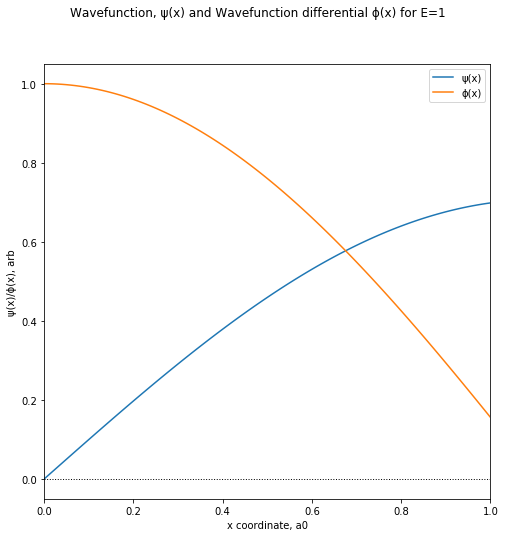

 Value of ψ(x) at x=1 boundary is 0.6984559985807504


In [4]:
# Initial variables

x_tot= 1 #a0
dx= 0.01 #a0
N= round(x_tot/dx)
E0= 1.0 # Eh
a= 1.0

psi0 = np.array([0.0,a]) 
# Array in form of [psi,phi]

# Evaluates differential and gives arrays for values at x=0
psi, phi = RK4_solver(RHS_Schro, psi0, dx, N, E0)
x = np.arange(0, (N+1)*dx, dx)
 
# Plot functions
plot1, ax1= plt.subplots(1, figsize= (8,8))
plot1.suptitle('Wavefunction, ψ(x) and Wavefunction differential ϕ(x) for E=1 ')

# Function plots 
ax1.plot(x, psi, label= 'ψ(x)')
ax1.plot(x, phi, label= 'ϕ(x)')

# Labels, legend and axis
ax1.set_xlim(0,1)
ax1.axhline(color='k',ls=':', lw='1')
ax1.legend(loc="upper right")
ax1.set(xlabel= 'x coordinate, a0', ylabel= 'ψ(x)/ϕ(x), arb')
plt.show()

# Psi at x=1:
P0= psi[N]
print(' Value of ψ(x) at x=1 boundary is', P0) 

### Section 4: Bisection: 
We can do a bisection algorthim to solve for the boundary conditions, over and under shooting to find energy value that correspondes to $\psi(x=1)=0$

In [5]:
# Initial variables
x_tot= 1 #a0
dx= 0.01 #a0
N= round(x_tot/dx)

# Bracket vales/ Upper and lower bound for Energy
E0 = 1.0
psi0, phi0 = RK4_solver(RHS_Schro, psi0, dx, N, E0)
P0= psi0[N]

E_2 = 11.0
psi_2, phi_2 = RK4_solver(RHS_Schro, psi0, dx, N, E_2)
P_2= psi_2[N]

# Iitiaing tolerences, count and error
tol = 1e-11
err = abs(P_2-P0)
n=0

store_psi= [psi0]

while err > tol:
# Loops untill the width of brakets is within the tolerence 
    
    n+=1
    # Counts iteration
    
    E_3 = E_2 + E_2*(E_2-E0)/(P_2-P0)
    
    E0 = E1
    E1 = E_
    f0 = f1
    
    psi_3, phi_3 = RK4_solver(RHS_Schro, psi0, dx, N, E_3)
    P_3= psi_3[N]
    
    err = abs(P_b-P0)
    # Re-calculates width of bracket/ error
    
    store_psi.append(psi_c)
    # Appends intimediate energy values

    
print("Initial Energy required is ", E_c, '. This give a value of ψ(x) at x=1 boundary of ',P_c, n,
      '.\n Number of iterations taken is', n,'\n')

Initial Energy required is  4.934802280637086 . This give a value of ψ(x) at x=1 boundary of  -4.938827125045009e-13 37 .
 Number of iterations taken is 37 



In [ ]:
# Initial variables
x_tot= 1 #a0
dx= 0.01 #a0
N= round(x_tot/dx)

# Bracket vales/ Upper and lower bound for Energy
E_a = 1.0
psi_a, phi_a = RK4_solver(RHS_Schro, psi0, dx, N, E_a)
P_a= psi_a[N]

E_b = 11.0
psi_b, phi_b = RK4_solver(RHS_Schro, psi0, dx, N, E_b)
P_b= psi_b[N]

# Iitiaing tolerences, count and error
tol = 1e-11
err = abs(P_b-P_a)
n=0

store_psi= [psi_a]

while err > tol:
# Loops untill the width of brakets is within the tolerence 
    
    n+=1
    # Counts iteration
    
    E_c = (E_a + E_b)/2
    psi_c, phi_c = RK4_solver(RHS_Schro, psi0, dx, N, E_c)
    P_c= psi_c[N]
    # Finds midpoint between a and b, and passes to  solver function, and finds psi at x=1
    
    if P_c/P_a>0:
    # If psi(x=1) for E_a and E_c have same sign, 'a' values are replaced with 'c' values
        E_a = E_c
        P_a = P_c
        
    else:
    # If psi(x=1) for E_a and E_c have oppisite sign, 'a' values are replaced with 'c' values
        E_b = E_c
        P_b = P_c
    
    err = abs(P_b-P_a)
    # Re-calculates width of bracket/ error
    
    store_psi.append(psi_c)
    # Appends intimediate energy values

    
print("Initial Energy required is ", E_c, '. This give a value of ψ(x) at x=1 boundary of ',P_c, n,
      '.\n Number of iterations taken is', n,'\n')

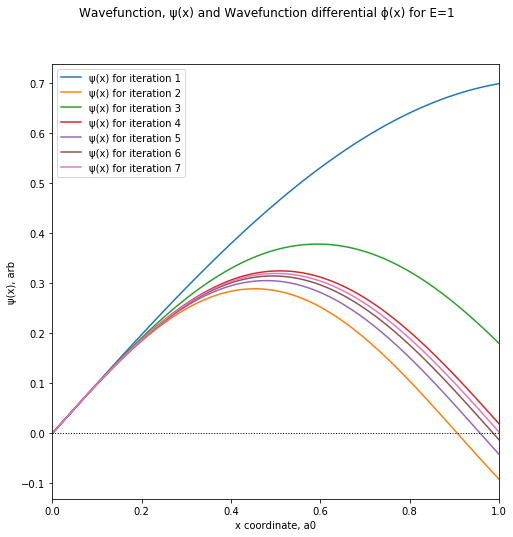

In [6]:
# Plot initial iterations
plot2, ax2= plt.subplots(1, figsize= (8,8))
plot2.suptitle('Wavefunction, ψ(x) and Wavefunction differential ϕ(x) for E=1 ')

# Function plots 
for i in range(7):
    ax2.plot(x, store_psi[i], label= 'ψ(x) for iteration {0}'.format(i+1))

# Labels, legend and axis
ax2.set_xlim(0,1)
ax2.axhline(color='k',ls=':', lw='1')
ax2.legend(loc='upper left')
ax2.set(xlabel= 'x coordinate, a0', ylabel= 'ψ(x), arb')
plt.show()

### Section 5: Normalise and plot:

Finally, normalise the output wavefunction. We require:
$$\int_{0}^{1} |\psi(x)^2| dx=1$$

Using integrate.simps we find the integral of $\psi^2$ as A, and normalise equals  $\frac{1}{\sqrt A}\psi(x)$. Make a plot of the final wavefunction.


Normalisation  constant for the wave function, A=  0.05066059096509815


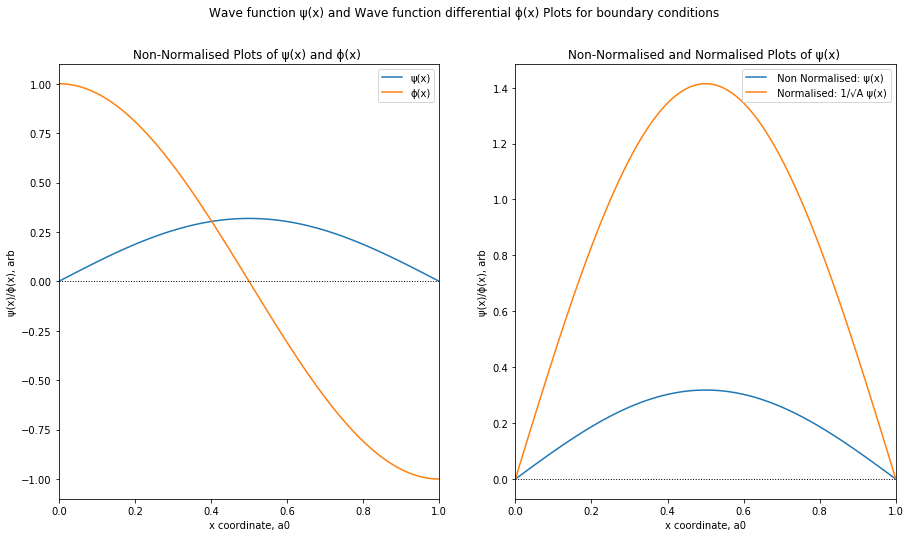

In [7]:
# Initial variables
x_tot= 1 #a0
dx= 0.01 #a0
N= round(x_tot/dx)

psi1, phi1 = RK4_solver(RHS_Schro, psi0, dx, N, E_c)
x = np.arange(0, (N+1)*dx, dx)

norm = integrate.simps(psi1*psi1, x)
# Integrates psi to normalise

print("Normalisation  constant for the wave function, A= ", norm)

psi2 = psi1/np.sqrt(norm)
phi2 = phi1/np.sqrt(norm)

plot3, ax3= plt.subplots(1, 2, figsize=(15,8))
plot3.suptitle('Wave function ψ(x) and Wave function differential ϕ(x) Plots for boundary conditions')

# None Normalised Plots
ax3[0].plot(x, psi1, label= 'ψ(x)')
ax3[0].plot(x, phi1, label= 'ϕ(x)')
ax3[0].set_title('Non-Normalised Plots of ψ(x) and ϕ(x) ')

# Labels, legend and axis
ax3[0].set_xlim(0,1)
ax3[0].axhline(color='k',ls=':', lw='1')
ax3[0].legend(loc="upper right")
ax3[0].set(xlabel= 'x coordinate, a0', ylabel= 'ψ(x)/ϕ(x), arb')

# Normalised Plots
ax3[1].plot(x, psi1, label= ' Non Normalised: ψ(x)')
ax3[1].plot(x, psi2, label= ' Normalised: 1/√A ψ(x)')
ax3[1].set_title('Non-Normalised and Normalised Plots of ψ(x) ')

# Labels, legend and axis
ax3[1].set_xlim(0,1)
ax3[1].axhline(color='k',ls=':', lw='1')
ax3[1].legend(loc="upper right")
ax3[1].set(xlabel= 'x coordinate, a0', ylabel= 'ψ(x)/ϕ(x), arb')

plt.show()

### Section 6: Compare to analytic wavefunction:
Now we will compare the wavefunction found to the known analytic solution. Using the same spacing in $x$, create an array for $x$ running from 0 to 1 inclusive. Create an array for the analytic solution $\psi_A(x)=Bsin(kx)$, where $k=\pi$ and you should calculate B to normalise $\psi_A$ (set $B=1$ and use the same procedure as before). Plot the difference between the two solutions, and comment briefly on the result and its relation to your tolerance.

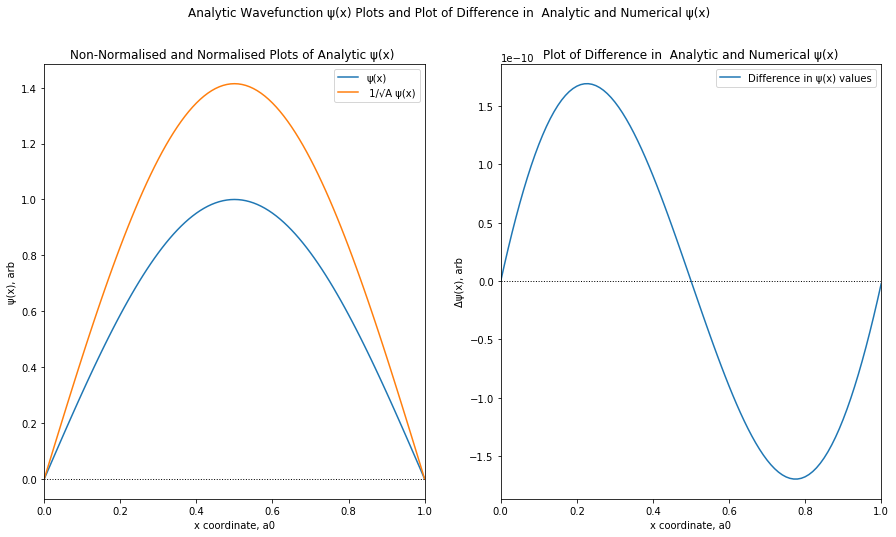

In [8]:
# Initial variables
x_tot= 1 #a0
dx= 0.01 #a0
N= round(x_tot/dx)

# Analytic function variables
k = np.pi
B=1

# Analytic psi and normalistation
a_psi = B*np.sin(k*x)
a_norm = integrate.simps(a_psi*a_psi, x)
norm_a_psi = a_psi/np.sqrt(a_norm)

# x array 
x = np.arange(0, (N+1)*dx, dx)

# Analytic psi and difference plots
plot4, ax4= plt.subplots(1,2, figsize=(15,8))
plot4.suptitle('Analytic Wavefunction ψ(x) Plots and Plot of Difference in  Analytic and Numerical ψ(x)')

# Analytic Plots
ax4[0].plot(x, a_psi, label= 'ψ(x)')
ax4[0].plot(x, norm_a_psi, label= ' 1/√A ψ(x)')
ax4[0].set_title('Non-Normalised and Normalised Plots of Analytic ψ(x) ')

# Labels, legend and axis
ax4[0].set_xlim(0,1)
ax4[0].axhline(color='k',ls=':', lw='1')
ax4[0].legend(loc="upper right")
ax4[0].set(xlabel= 'x coordinate, a0', ylabel= 'ψ(x), arb')

# Different Plot and a sine plot for reference
ax4[1].plot(x, (psi2 - norm_a_psi) , label= 'Difference in ψ(x) values')
#ax4[1].plot(x, 1.7e-10*np.sin(x*2*np.pi), label= 'Sin(x)')
ax4[1].set_title('Plot of Difference in  Analytic and Numerical ψ(x)')


# Labels, legend and axis
ax4[1].set_xlim(0,1)
ax4[1].axhline(color='k',ls=':', lw='1')
ax4[1].legend(loc="upper right")
ax4[1].set(xlabel= 'x coordinate, a0', ylabel= 'Δψ(x), arb')

plt.show()

#### Comment:

We see that the difference in analytic and numerical value for $\psi(x)$ gives a sinusoidal plot, this difference can be accounted for from the error induced from the bisection algorthm to solve for the boundary. If we change the tolerance for the bisection loop we see the differences order of magnitude changes correspondingly and becomes less sinusodial. This results is consistent as when implementing our bisection algorithm at a high tolerence the over and undershooting are large and the difference is significant, giving a resulting divergent difference in analytic and numeric values.
 
At low tolerence the sinusodial shape may develope as when the numeric solution is normalised its amplitude is increased streaching the plot, as there will be a small divergence at x=1 from zero due to the tolerance. This results in the numerical solution being slightly shifted(streached along x) compared to the analytic solution- thus the difference will be sinusoidal (similar to the same way the difference in two translated waves will be the sinusoidal phase difference)

### Conclusion: 

We have suscessfully implimented numerical solutions for coupled second order ODE and then using bisection algorithm have solved the schrodinger equation for this boundary value problem. We have sucessfully implimented the 4th order Runge-Kutta method for finite differences and, in addition, we have seen how the tolerence of our bisection algorithm can affect the precision when solving for BVP.